In [1]:
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import itertools
from matplotlib.cm import ScalarMappable

In [8]:
N_realisation = 45
path = f'lineplume_sims_3D/temp/'

# Load the data
with open(path + 'deposit_dict.pkl', 'rb') as f:
    deposit_dict = pickle.load(f)


alpha = 0.4
St0, Fr = 0.2, 0.5
Ux_avg = 0.6586
dt = 0.03
t0 = 0
tEnd = 8

/tmp/ipykernel_1426/3101726309.py:29: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_locs, y_locs, s=sizes*100 ,marker='^',c=time_colors[color_index], alpha=0.7)


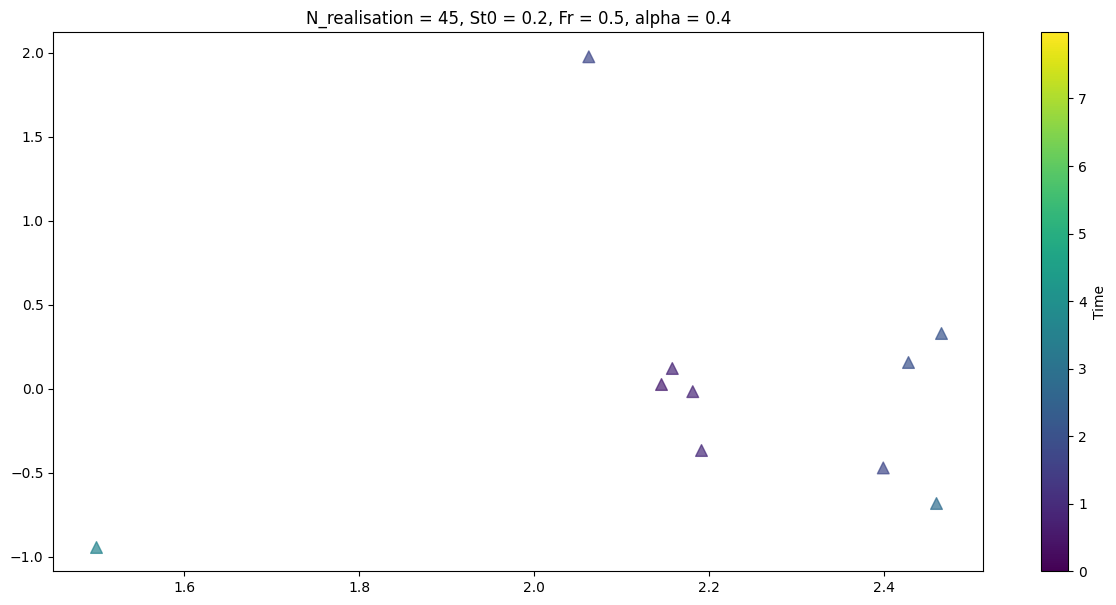

In [9]:
med_st = []
cumulative_df = []
times = np.arange(0, tEnd, dt) 
time_colors = plt.cm.viridis(times/np.max(times))

fig, ax = plt.subplots(figsize=(15, 7))
# bars = ax.bar(times, height=[1]*len(times), color=time_colors, edgecolor='black')

for time, data in deposit_dict.items():

    if data is not None:
        time = round(time, 2) 
        color_index = int(time/dt)
        x_locs = data[: int(len(data)/5)] + Ux_avg * time
        y_locs = data[int(len(data)/5): int(2*len(data)/5)]
        z_locs = data[int(2*len(data)/5): int(3*len(data)/5)]
        sizes = data[int(3*len(data)/5): int(4*len(data)/5)] ** (1/2)
        inring_fraction = data[int(4*len(data)/5):]

        med_st.append(np.median(data[int(3*len(data)/5): int(4*len(data)/5)]))
        # if data is not None:
        #     plt.scatter(time, len(data)/5, color='black')
        
        # else:
        #     plt.scatter(time, 0, color='black')
    
        #     plt.hist(data[:int(len(data)/5)], bins=100, alpha=0.5, label=f'time = {time}')
        if np.sum(inring_fraction) > 0:
            plt.scatter(x_locs, y_locs, s=sizes*100 ,marker='^',c=time_colors[color_index], alpha=0.7)
        # plt.scatter(x_locs, y_locs, s=sizes*5 ,c=inring_fraction, alpha=0.7)
        # plt.scatter(x_locs[inring_fraction>0.7], y_locs[])
    
    else:
        med_st.append(0)

plt.title(f'N_realisation = {N_realisation}, St0 = {St0}, Fr = {Fr}, alpha = {alpha}')
sm = ScalarMappable(cmap=plt.cm.viridis, norm=plt.Normalize(vmin=0, vmax=np.max(times)))
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Time')


plot snaps of traces of bubbles

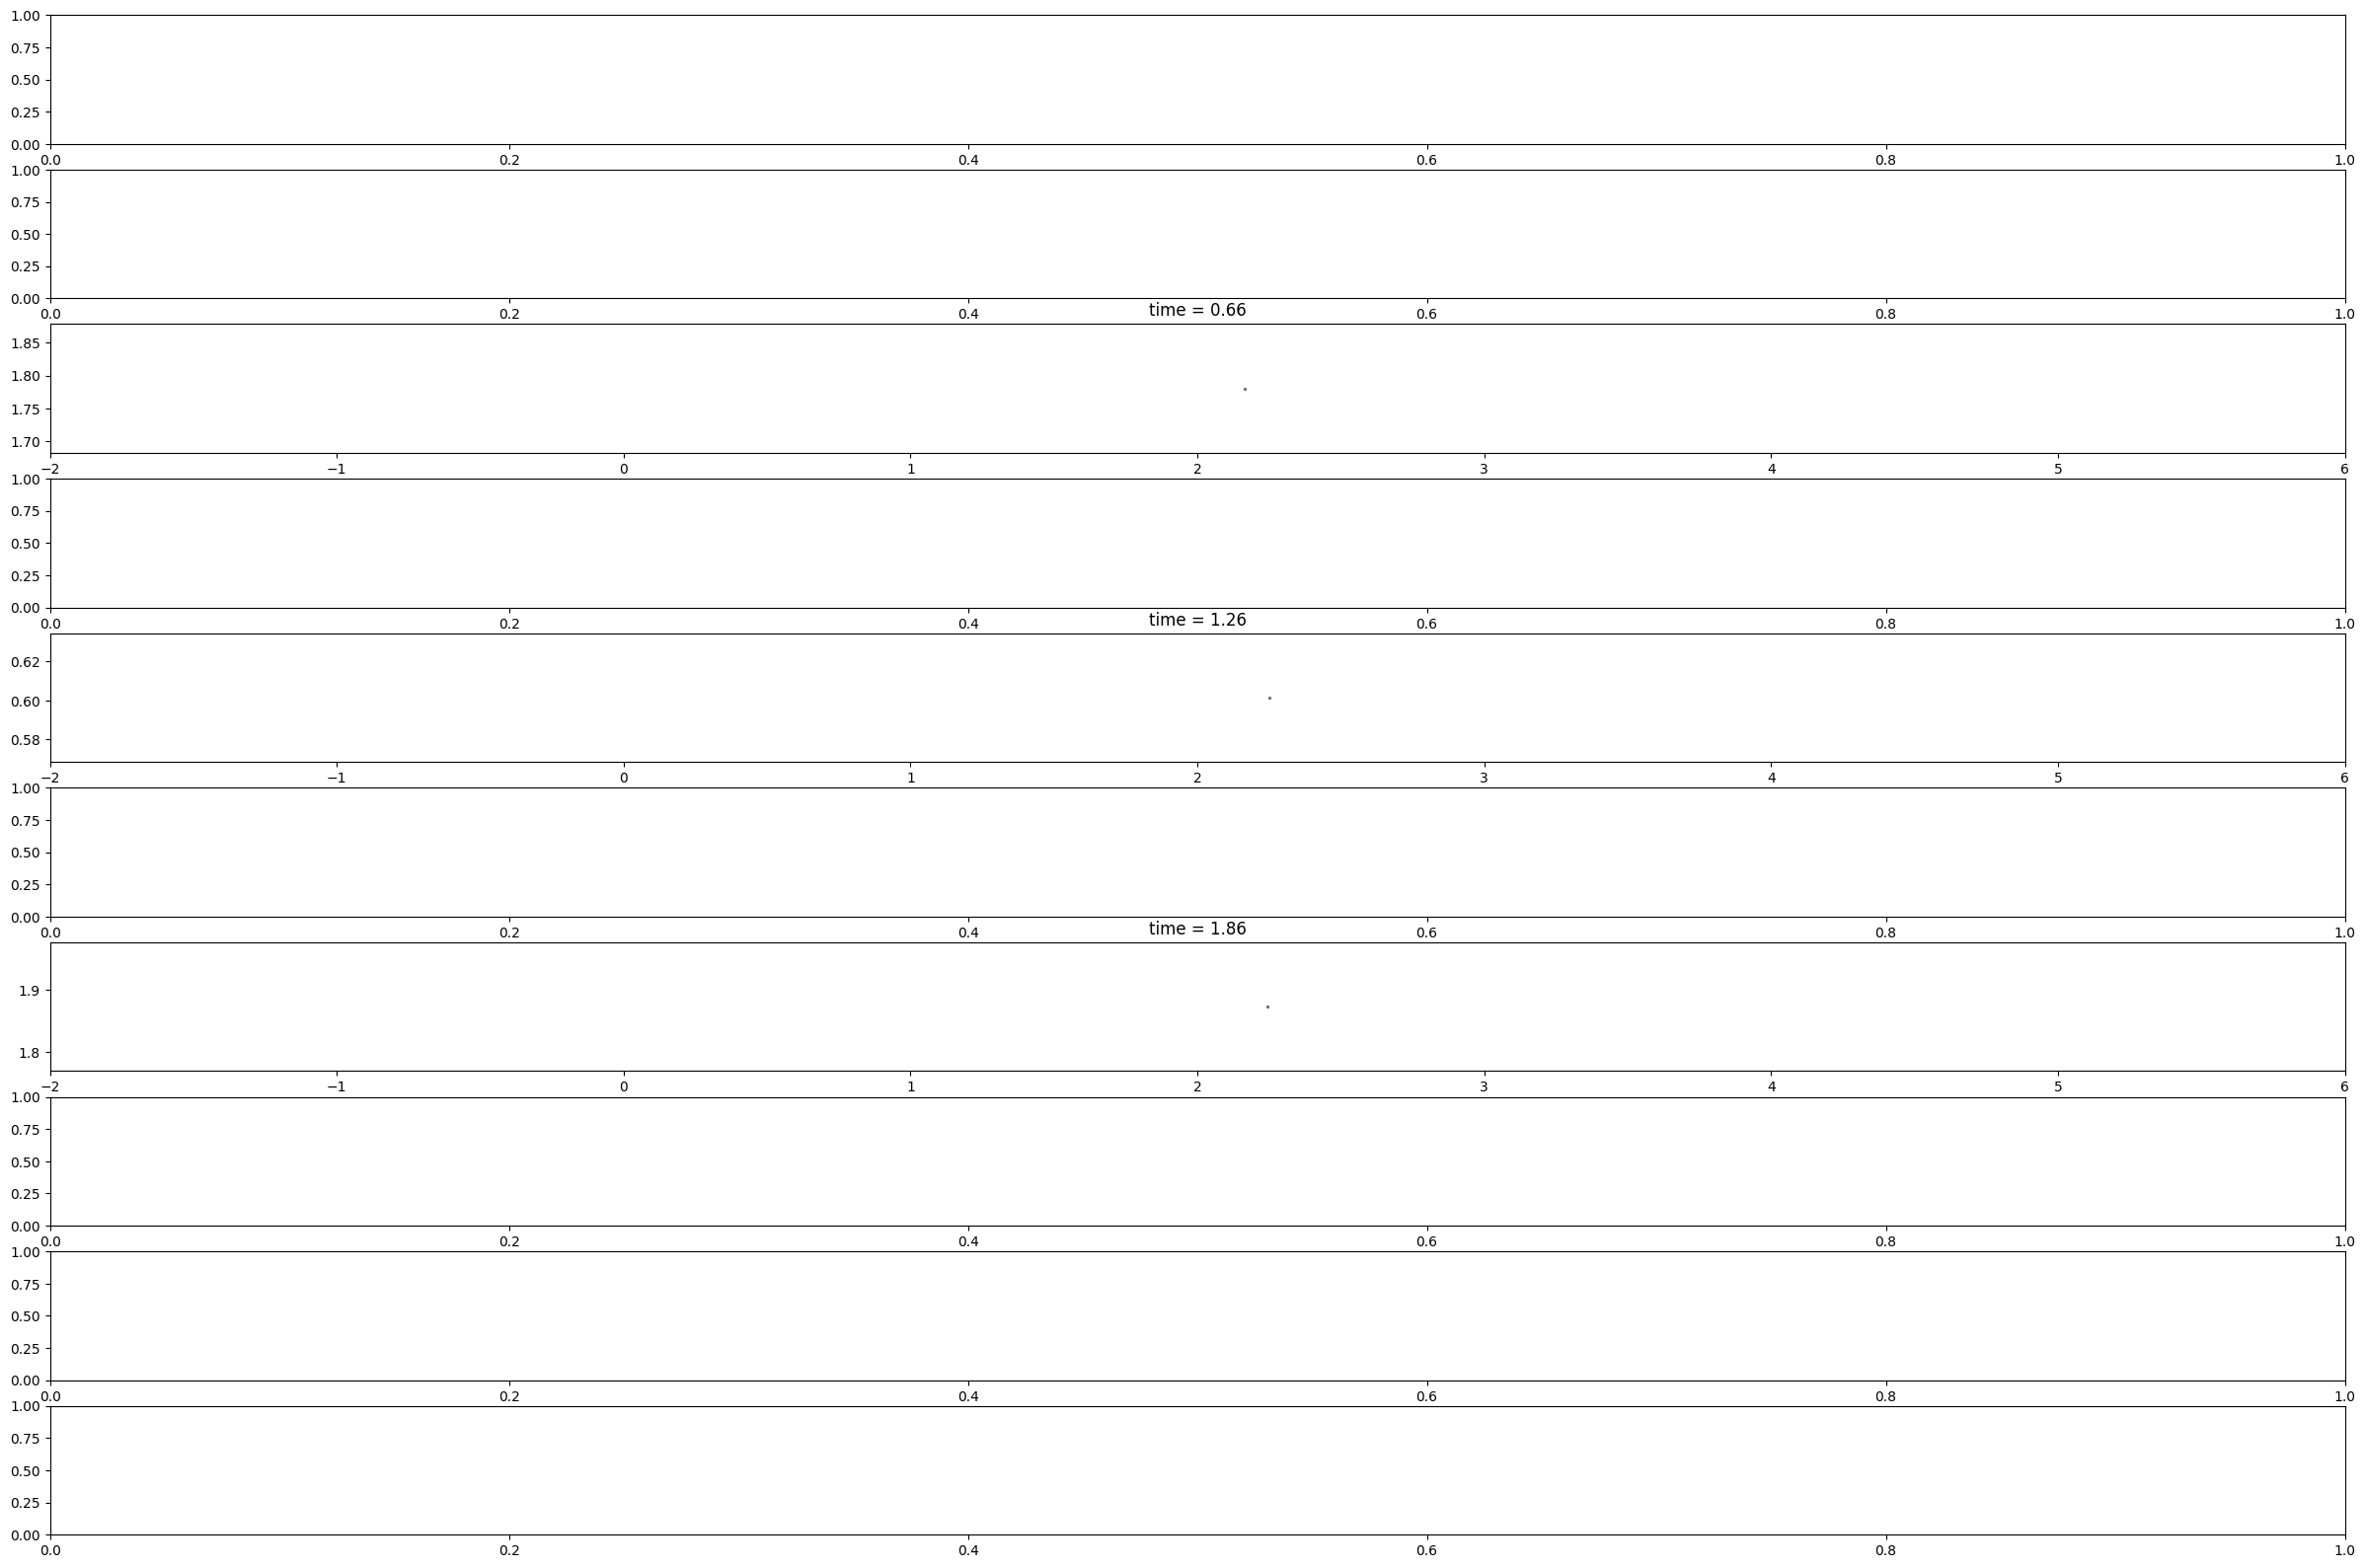

In [8]:
sampling_points = np.arange(2, len(deposit_dict), 10)

fig, ax = plt.subplots(len(sampling_points), figsize=(30, 20))

for ind, i in enumerate(sampling_points):
    sample = dict(itertools.islice(deposit_dict.items(), i, i+1))
    time = round(list(sample.keys())[0], 3)

    data = list(sample.values())[0]
    if data is None:
        continue
    x_locs = data[: int(len(data)/5)] + Ux_avg * time
    y_locs = data[int(len(data)/5): int(2*len(data)/5)]
    z_locs = data[int(2*len(data)/5): int(3*len(data)/5)]
    stokes = data[int(3*len(data)/5): int(4*len(data)/5)]
    inring_fraction = data[int(4*len(data)/5):]

    # traces
    ax[ind].scatter(x_locs, y_locs, s=(stokes**0.5)*5 ,c=inring_fraction, alpha=0.5)
    ax[ind].set_title(f'time = {time}')
    ax[ind].set_xlim(-2, 6)

    # #histogram
    # ax[ind].hist(stokes, bins=10, alpha=0.5, label=f'time = {time}')

# plt.hist(x_locs, bins=100, alpha=0.5, label=f'time = {time}');

NameError: name 'sampling_points' is not defined

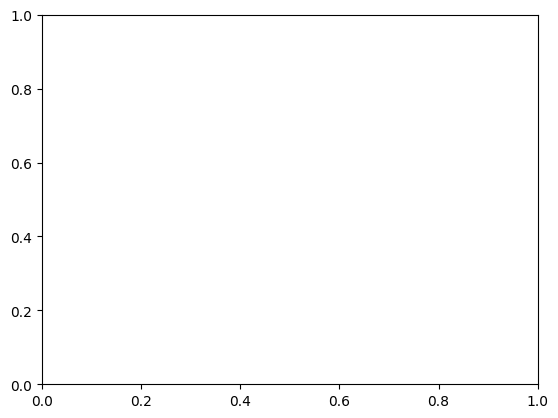

In [5]:
import pandas as pd

deposit_df = pd.DataFrame(columns=['time', 'x', 'y', 'z', 'stokes', 'inring_fraction'])

fig, ax = plt.subplots()

times = []

for ind in sampling_points:
    sample = dict(itertools.islice(deposit_dict.items(), ind, ind+1))
    time = round(list(sample.keys())[0], 3)
    times.append(time)
    data = list(sample.values())[0]
    if data is not None:
        new_data = pd.DataFrame({'time' :[time]*int(len(data)/5), 'x': data[: int(len(data)/5)] + Ux_avg * time, 
                                'y': data[int(len(data)/5): int(2*len(data)/5)], 
                                'z': data[int(2*len(data)/5): int(3*len(data)/5)], 
                                'stokes': data[int(3*len(data)/5): int(4*len(data)/5)], 
                                'inring_fraction': data[int(4*len(data)/5):]})
        deposit_df = pd.concat([deposit_df, new_data])
        
        ## plot individual time steps
        # ax[i].hist(deposit_df['stokes'], bins=5, alpha=0.5, label=f'time = {time}')
        # ax[i].set_title(f'time = {time}')


# plot histogram for stokes size distribution
unique_stokes = sorted(np.round(deposit_df['stokes'].unique(), 3))
bin_edges = np.array(unique_stokes + [unique_stokes[-1] + 1])

# Calculate the number of bars per group and the total width of each group
n_bars = len(times)  # Number of bars (groups)
bar_width = 0.3 / n_bars  # Width of each bar
x = np.arange(len(unique_stokes))  # Positions for the bars

# Create a histogram data for each time point using the unique stokes as bins
for i, time in enumerate(times):
    data_to_plot = deposit_df[deposit_df['time'] == time]['stokes']
    hist_data, _ = np.histogram(data_to_plot, bins=bin_edges)
    # Plot each group
    ax.bar(x + i * bar_width, hist_data, width=bar_width, alpha=0.7, label=f'Time = {time}', color=plt.cm.viridis(i / len(set(times))))

# Label configuration
ax.set_title('Newly deposited bubbles')
ax.set_xlabel('Stokes Sizes')
ax.set_xticks(x + bar_width * (n_bars - 1) / 2)  # Center x-ticks between the bars
ax.set_xticklabels([f'{value}' for value in unique_stokes])
ax.set_ylabel('Frequency')
# ax.legend(title='Time Stamp')




In [10]:
cumulative_df = pd.DataFrame(columns=['time', 'x', 'y', 'z', 'stokes', 'inring_fraction'])

for time in sorted(deposit_dict.keys()):
    data = deposit_dict[time]
    if data is not None:
        features = np.transpose(np.split(data, 5))
        features[:, 0] += Ux_avg * time

        df = pd.DataFrame(features, columns=['x', 'y', 'z', 'stokes', 'inring_fraction'])
        df['time'] = time

        cumulative_df = pd.concat([cumulative_df, df])




/tmp/ipykernel_23749/3800371448.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  cumulative_df = pd.concat([cumulative_df, df])


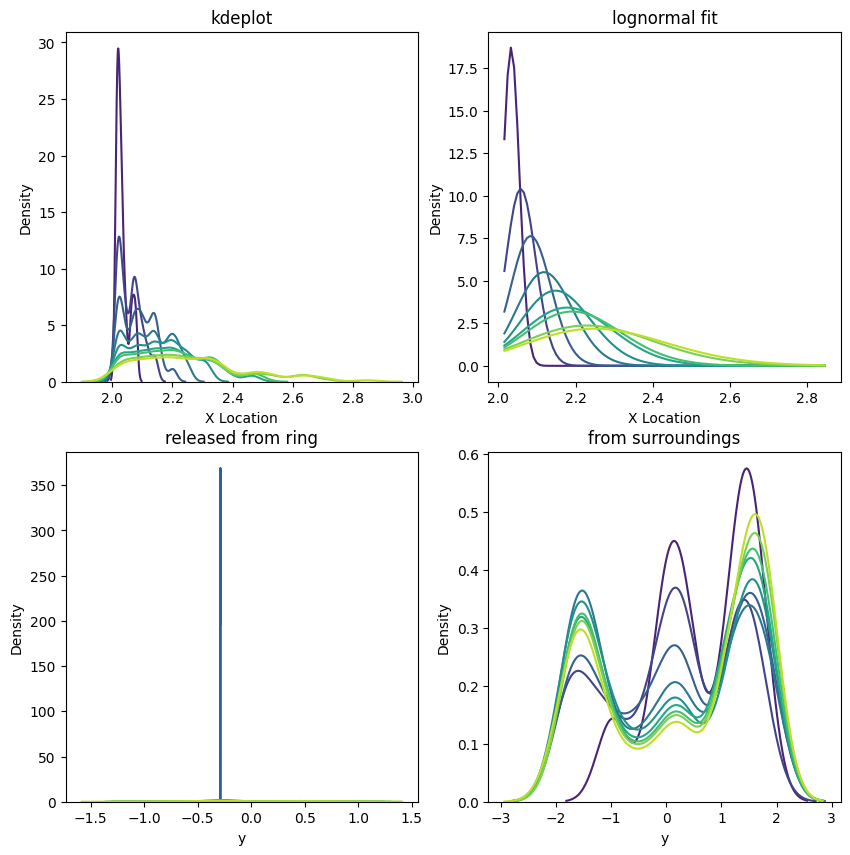

In [11]:
import seaborn as sns
from scipy.stats import lognorm

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

for i, time in enumerate(times):
    data_at_time = cumulative_df[cumulative_df['time'] <= time]

    # kdeplot for x location
    if i == 0:
        sns.kdeplot(data_at_time['x'], label=f'time = {time}', ax=ax[0, 0], bw_adjust=0.5, linestyle='--', color='black')
        sns.kdeplot(data_at_time[data_at_time['inring_fraction'] > 0]['y'], label=f'time = {time}', ax=ax[1, 0], bw_adjust=0.5, linestyle='--', color='black')
        sns.kdeplot(data_at_time[data_at_time['inring_fraction'] == 0.0]['y'], label=f'time = {time}', ax=ax[1, 1], bw_adjust=0.5, linestyle='--', color='black')
    else:
        sns.kdeplot(data_at_time['x'], label=f'time = {time}', ax=ax[0, 0], bw_adjust=0.5, color=plt.cm.viridis(i / len(set(times))))
        sns.kdeplot(data_at_time[data_at_time['inring_fraction'] > 0]['y'], label=f'time = {time}', ax=ax[1, 0], bw_adjust=0.5, color=plt.cm.viridis(i / len(set(times))))
        sns.kdeplot(data_at_time[data_at_time['inring_fraction'] == 0.0]['y'], label=f'time = {time}', ax=ax[1, 1], bw_adjust=0.5, color=plt.cm.viridis(i / len(set(times))))

    ax[1,0].set_title('released from ring')
    ax[1,1].set_title('from surroundings')

    ax[0, 0].set_title('kdeplot')
    ax[0, 0].set_xlabel('X Location')
    ax[0, 0].set_ylabel('Density')
    # ax[0].legend(title='Time Stamp')

    # log-normal fit
    if data_at_time is not None and i > 0:
        data_log = np.log(data_at_time[data_at_time > 0]['x'])  # Only take positive values for log transformation
        sigma = data_log.std()
        mu = data_log.mean()

        # Define the lognormal distribution based on mu and sigma
        dist = lognorm(s=sigma, scale=np.exp(mu))

        # Generate values for the PDF
        values = np.linspace(min(cumulative_df['x']), max(cumulative_df['x']), 100)
        pdf = dist.pdf(values)
        ax[0, 1].plot(values, pdf,  label=f'time = {time}', color=plt.cm.viridis(i / len(set(times))))
        ax[0, 1].set_title('lognormal fit')
        ax[0, 1].set_xlabel('X Location')
        ax[0, 1].set_ylabel('Density')
        # ax[1].legend(title='Time Stamp')

# fig.suptitle('cumulative X Location Distribution')
# Show the plot
plt.show()


/home/zhizhi/newCodes_norburyRings/venv/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


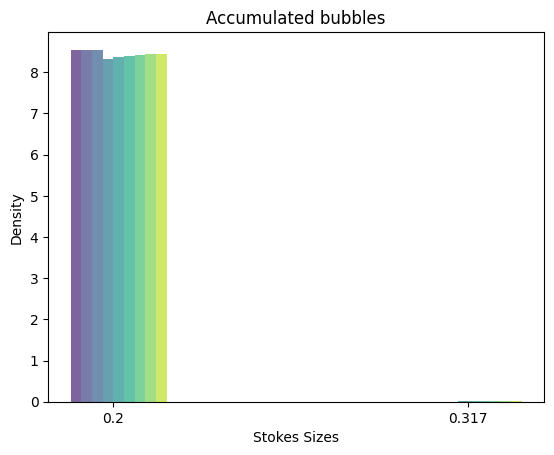

In [12]:
fig, ax = plt.subplots()

# plot histogram for stokes size distribution
unique_stokes = sorted(np.round(cumulative_df['stokes'].unique(), 3))
bin_edges = np.array(unique_stokes + [unique_stokes[-1] + 1])

# Calculate the number of bars per group and the total width of each group
n_bars = len(times)  # Number of bars (groups)
bar_width = 0.3 / n_bars  # Width of each bar
x = np.arange(len(unique_stokes))  # Positions for the bars

# Create a histogram data for each time point using the unique stokes as bins
for i, time in enumerate(times):
    data_to_plot = cumulative_df[cumulative_df['time'] <= time]['stokes']
    hist_data, _ = np.histogram(data_to_plot, bins=bin_edges, density=True)
    # Plot each group
    ax.bar(x + i * bar_width, hist_data, width=bar_width, alpha=0.7, label=f'Time = {time}', color=plt.cm.viridis(i / len(set(times))))

# Label configuration
ax.set_title('Accumulated bubbles')
ax.set_xlabel('Stokes Sizes')
ax.set_xticks(x + bar_width * (n_bars - 1) / 2)  # Center x-ticks between the bars
ax.set_xticklabels([f'{value}' for value in unique_stokes])
ax.set_ylabel('Density')
# ax.legend(title='Time Stamp')

plt.show()

# inring fraction

/home/zhizhi/newCodes_norburyRings/venv/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/zhizhi/newCodes_norburyRings/venv/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/zhizhi/newCodes_norburyRings/venv/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/zhizhi/newCodes_norburyRings/venv/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/zhizhi/newCodes_norburyRings/venv/lib/python3.11/site-packages/numpy/lib/_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/home/zhizhi/newCodes_norburyRings/venv/lib/python3.11/

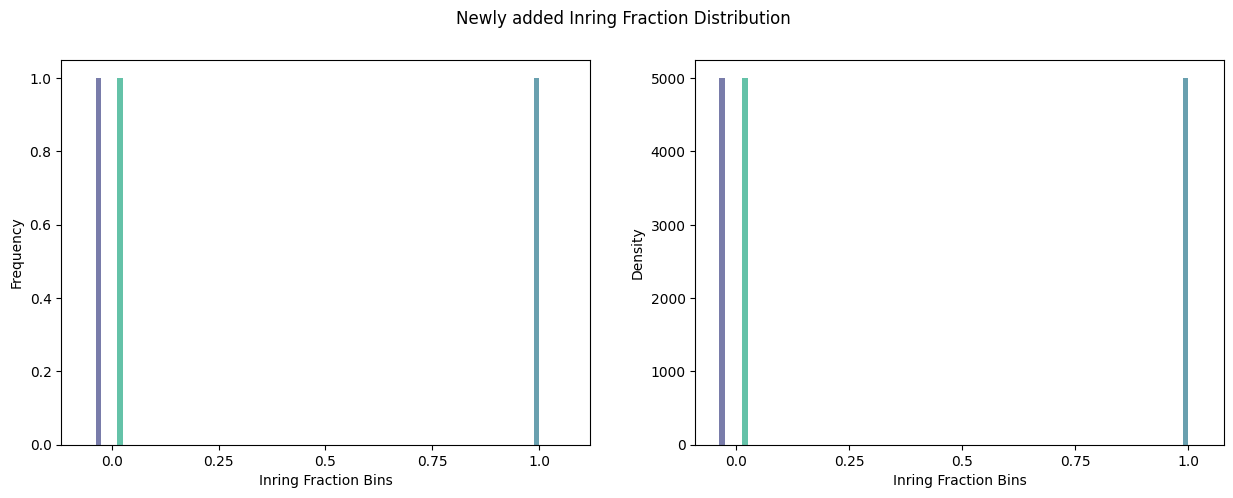

In [13]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

# Manually define bin edges according to specified ranges
bin_edges = np.array([-0.0001, 0.0001, 0.4999, 0.5001, 0.9999, 1.0001])
# bin_edges = np.array([-0.00001, 0, 0.5, 1, 1.00001])

# Calculate the number of bins (N-1 for N edges) and positions for the bars
n_bins = len(bin_edges) - 1
x = np.arange(n_bins)  # Positions for the bars
n_bars = len(times)  # Number of bars (groups)
bar_width = 0.5 / n_bars  # Width of each bar

# Create histogram data for each time point using the manually defined bins
for i, time in enumerate(times):
    data_to_plot = deposit_df[deposit_df['time'] == time]['inring_fraction']
    hist_data, _ = np.histogram(data_to_plot, bins=bin_edges)
    
    # Plot each group, shifting the bar position so bars do not overlap
    ax[0].bar(x + i * bar_width, hist_data, width=bar_width, alpha=0.7, label=f'Time = {time}', color=plt.cm.viridis(i / len(times)))

    # # Configure the x-axis to show bin labels centered between the bars
    ax[0].set_xticks(x + bar_width * (n_bars - 1) / 2)
    ax[0].set_xticklabels([f'{j/(n_bins-1)}' for j in range(n_bins)])

    # ax[0].legend(title='Time Stamp')
    ax[0].set_xlabel('Inring Fraction Bins')
    ax[0].set_ylabel('Frequency')

    hist_data, _ = np.histogram(data_to_plot, bins=bin_edges, density=True)
    ax[1].bar(x + i * bar_width, hist_data, width=bar_width, alpha=0.7, label=f'Time = {time}', color=plt.cm.viridis(i / len(times)))
    ax[1].set_xticks(x + bar_width * (n_bars - 1) / 2)
    ax[1].set_xticklabels([f'{j/(n_bins-1)}' for j in range(n_bins)])
    # ax[1].legend(title='Time Stamp')
    ax[1].set_xlabel('Inring Fraction Bins')
    ax[1].set_ylabel('Density')

fig.suptitle('Newly added Inring Fraction Distribution')
plt.show()


Text(0, 0.5, 'Stokes')

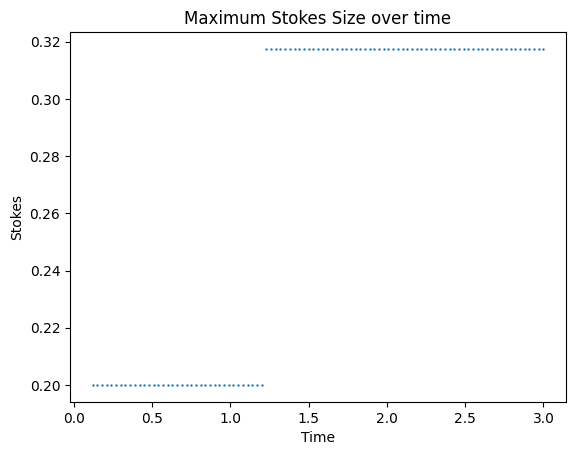

In [14]:
max_st = []

for time in sorted(deposit_dict.keys()):
    data = cumulative_df[cumulative_df['time'] <= time]['stokes']
    max_st.append(data.max())

plt.scatter(sorted(deposit_dict.keys()), max_st, s=0.5)
plt.title('Maximum Stokes Size over time')
plt.xlabel('Time')
plt.ylabel('Stokes')

In [15]:
cumulative_inring_df = cumulative_df[cumulative_df['inring_fraction'] > 0]
cumulative_inring_df['vol'] = cumulative_inring_df['stokes']**1.5

time_counts = cumulative_inring_df['time'].value_counts().sort_index()
vol_sum_inring = (cumulative_inring_df.groupby('time')['vol']).sum().sort_index()

cumulative_outring_df = cumulative_df[cumulative_df['inring_fraction'] == 0]
cumulative_outring_df['vol'] = cumulative_outring_df['stokes']**1.5

time_counts_outring = cumulative_outring_df['time'].value_counts().sort_index()
vol_sum_outring = (cumulative_outring_df.groupby('time')['vol']).sum().sort_index()

# Create a cumulative count
cumulative_counts = time_counts.cumsum()
cumulative_vol = vol_sum_inring.cumsum()
rate_counts_inring = np.gradient(cumulative_counts, cumulative_counts.index)
rate_vol_inring = np.gradient(cumulative_vol, cumulative_vol.index)

cumulative_counts_outring = time_counts_outring.cumsum()
cumulative_vol_outring = vol_sum_outring.cumsum()
rate_counts_outring = np.gradient(cumulative_counts_outring, cumulative_counts_outring.index)
rate_vol_outring = np.gradient(cumulative_vol_outring, cumulative_vol_outring.index)


cumulative_counts_influx = np.cumsum(influx_series)
cumulative_vol_influx = np.cumsum(influx_series)* (St0**1.5)
rate_counts_influx = np.gradient(cumulative_counts_influx, dt)
rate_vol_influx = np.gradient(cumulative_vol_influx, dt)

# fit a line on influx rate
from scipy.optimize import curve_fit
influx_count_fit = np.polyfit(dt*np.arange(len(influx_series)), cumulative_counts_influx, 1)
influx_vol_fit = np.polyfit(dt*np.arange(len(influx_series)), cumulative_vol_influx, 1)
influx_count_fit_rate = influx_count_fit[0]
influx_vol_fit_rate = influx_vol_fit[0]

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0,0].plot(cumulative_counts.index, cumulative_counts, label='Inring')
ax[0,0].plot(cumulative_counts_outring.index, cumulative_counts_outring, label='Outring')
# ax[0].plot(dt*np.arange(len(influx_series)), cumulative_counts_influx, label='Influx')
ax[0,0].set_title('Cumulative count of deposit bubbles')
ax[0,0].set_xlabel('Time')
ax[0,0].set_ylabel('Count')
ax[0,0].legend()

ax[0,1].plot(cumulative_vol.index, cumulative_vol, label='Inring')
ax[0,1].plot(cumulative_vol_outring.index, cumulative_vol_outring, label='Outring')
# ax[1].plot(dt*np.arange(len(influx_series)), cumulative_vol_influx, label='Influx')
ax[0,1].set_title('Cumulative volume of deposit bubbles')
ax[0,1].set_xlabel('Time')
ax[0,1].set_ylabel('Volume')
ax[0,1].legend()

ax[1,0].plot(cumulative_counts.index, rate_counts_inring/influx_count_fit_rate, label='Inring')
ax[1,0].plot(cumulative_counts_outring.index, rate_counts_outring/influx_count_fit_rate,  label='Outring')
# ax[1,0].hlines(influx_count_fit_rate, 0, 10, color='red', label='Influx Rate')
ax[1,0].set_title('deposit # rate normalized by influx rate')
ax[1,0].set_xlabel('Time')
ax[1,0].legend()

ax[1,1].plot(cumulative_vol.index, rate_vol_inring/influx_vol_fit_rate, label='Inring')
ax[1,1].plot(cumulative_vol_outring.index, rate_vol_outring/influx_vol_fit_rate, label='Outring')
# ax[1,1].hlines(influx_vol_fit_rate, 0, 10, color='red', label='Influx Rate')
ax[1,1].set_title('deposit volume rate normalized by influx rate')
ax[1,1].set_xlabel('Time')
ax[1,1].legend()



/tmp/ipykernel_23749/3600864492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_inring_df['vol'] = cumulative_inring_df['stokes']**1.5
/tmp/ipykernel_23749/3600864492.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cumulative_outring_df['vol'] = cumulative_outring_df['stokes']**1.5


ValueError: Shape of array too small to calculate a numerical gradient, at least (edge_order + 1) elements are required.

centerline scatterness

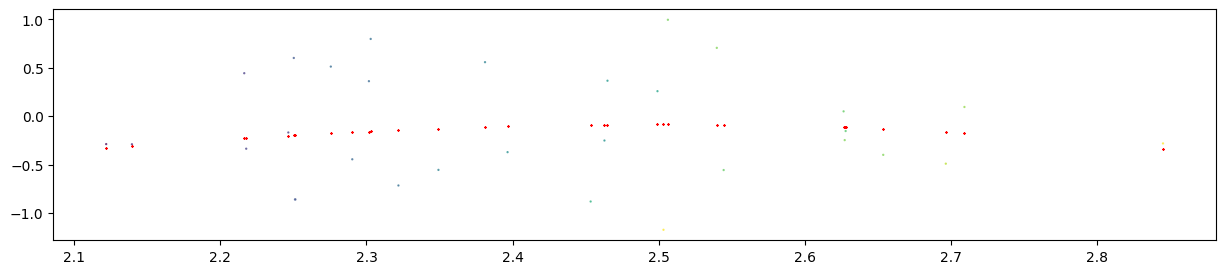

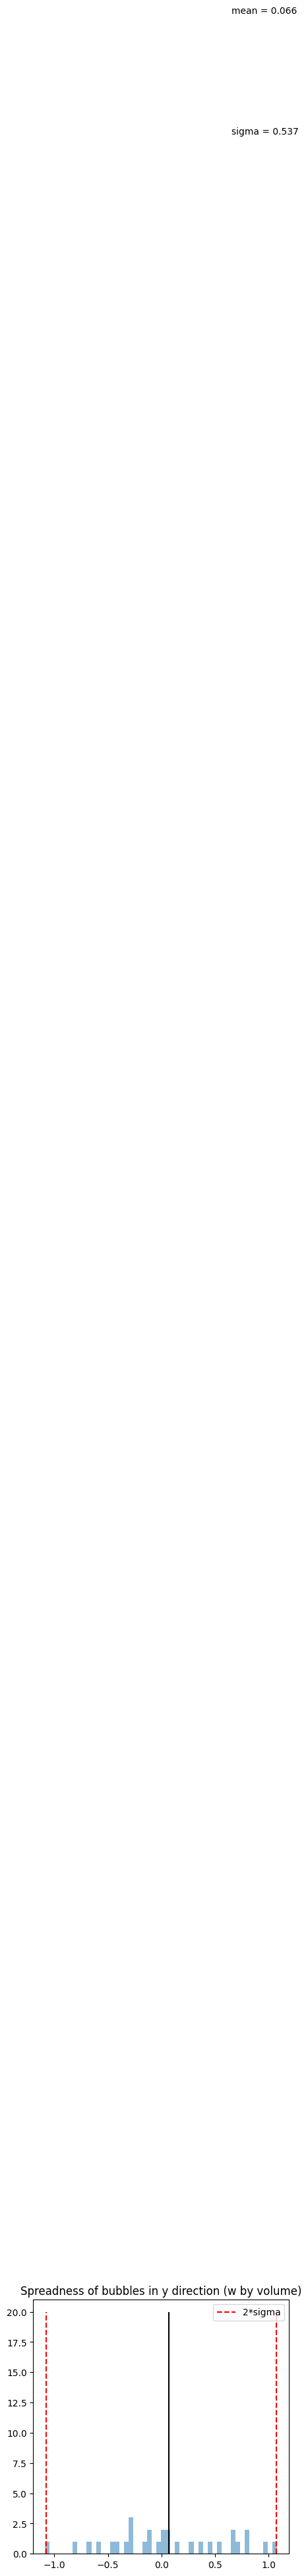

In [16]:
# fit a cubic centerline to the data
from scipy.optimize import curve_fit
x_bubbles = cumulative_inring_df['x']
y_bubbles = cumulative_inring_df['y']
vol_bubbles = cumulative_inring_df['vol']

y_fit = np.polyfit(x_bubbles, y_bubbles, 3, w = vol_bubbles)
y_cl = np.polyval(y_fit, x_bubbles)
delta_y = y_bubbles - y_cl
spreadness = np.std(delta_y)

plt.figure(figsize=(15, 3))
plt.scatter(x_bubbles, y_bubbles, s=(cumulative_inring_df['stokes']**1.5)*5, c=cumulative_inring_df['time'], alpha=0.7)
plt.scatter(x_bubbles, y_cl, color='red', marker='x', s=1)

plt.figure(figsize=(5, 5))
plt.hist(delta_y, bins=50, alpha=0.5);
plt.vlines(np.mean(delta_y), 0, 20, color='black')
plt.vlines(2*spreadness, 0, 20, color='red', linestyle='--', label='2*sigma')
plt.vlines(-2*spreadness, 0, 20, color='red', linestyle='--')
plt.text(0.65, 210, f'mean = {np.mean(delta_y) :.3f}')
plt.text(0.65, 200, f'sigma = {spreadness :.3f}')
plt.title('Spreadness of bubbles in y direction (w by volume)')
plt.legend()